In [11]:
import pandas as pd

# Cargar los datos en un DataFrame
df = pd.read_excel('DATASET NAME 3.5.xlsx')
df


,Año,Municipio,Produccion,Temperatura,Precipitacion,Riego adecuado (7 Dias),Gestion de plagas,Densidad (ha2),Espaciado entre planta (cm),Analisis de suelo (pH),Profundidad de siembra de planta (cm)
0,2008,COLOSO,3380.0,31.0200,0,7,0,4211,78,5.230000,11
1,2008,COROZAL,1232.0,28.7600,1,5,0,7852,82,6.120000,13
2,2008,SAMPUES,300.0,31.6400,2,3,1,2784,68,4.890000,10
3,2008,SAN BENITO ABAD,24.0,30.0000,1,5,1,8932,72,5.980000,8
4,2008,SAN JUAN DE BETULIA,2430.0,30.1200,0,7,0,5123,87,6.410000,14
...,...,...,...,...,...,...,...,...,...,...,...
1259,2023,SAN JUAN DE BETULIA,1000.0,33.1100,1,7,1,5563,60,4.716242,19
1260,2023,SINCE,310.0,33.1721,0,7,1,788,72,5.413196,18
1261,2023,SINCELEJO,2000.0,33.5780,1,4,0,7500,75,5.500000,10
1262,2023,SAN BENITO ABAD,35.0,33.1231,2,2,1,9000,80,6.800000,12


In [12]:
# Eliminar la columna 'Municipio'
df = df.drop('Municipio', axis=1)
df

,Año,Produccion,Temperatura,Precipitacion,Riego adecuado (7 Dias),Gestion de plagas,Densidad (ha2),Espaciado entre planta (cm),Analisis de suelo (pH),Profundidad de siembra de planta (cm)
0,2008,3380.0,31.0200,0,7,0,4211,78,5.230000,11
1,2008,1232.0,28.7600,1,5,0,7852,82,6.120000,13
2,2008,300.0,31.6400,2,3,1,2784,68,4.890000,10
3,2008,24.0,30.0000,1,5,1,8932,72,5.980000,8
4,2008,2430.0,30.1200,0,7,0,5123,87,6.410000,14
...,...,...,...,...,...,...,...,...,...,...
1259,2023,1000.0,33.1100,1,7,1,5563,60,4.716242,19
1260,2023,310.0,33.1721,0,7,1,788,72,5.413196,18
1261,2023,2000.0,33.5780,1,4,0,7500,75,5.500000,10
1262,2023,35.0,33.1231,2,2,1,9000,80,6.800000,12


In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Cargar el dataset
df = pd.read_excel('DATASET NAME 3.5.xlsx')

# Separar las columnas en variables independientes (X) y la variable objetivo (y)
X = df[['Año', 'Temperatura', 'Precipitacion', 'Riego adecuado (7 Dias)',
        'Gestion de plagas', 'Densidad (ha2)', 'Espaciado entre planta (cm)',
        'Analisis de suelo (pH)', 'Profundidad de siembra de planta (cm)']]
y = df['Produccion']

# Dividir el dataset en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predecir los valores en el conjunto de prueba
y_pred = model.predict(X_test)


In [14]:
# Calcular el error cuadrático medio
mse = mean_squared_error(y_test, y_pred)
print(f"Error cuadrático medio: {mse}")

Error cuadrático medio: 281833.39319724706


In [15]:

# Calcular el coeficiente de determinación R²
r2 = r2_score(y_test, y_pred)
print(f"Coeficiente de determinación R²: {r2}")

Coeficiente de determinación R²: 0.8793760268115227


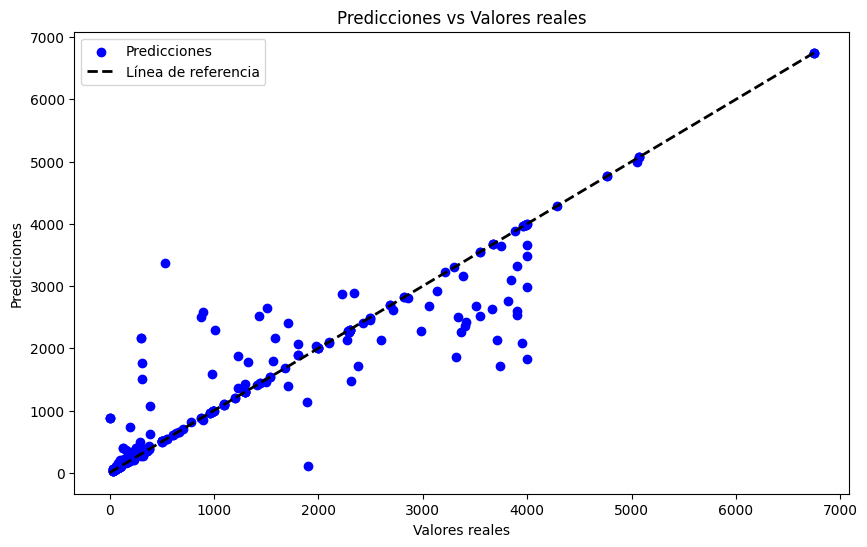

In [16]:
import matplotlib.pyplot as plt

# Graficar las predicciones vs los valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicciones')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Línea de referencia')
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores reales')
plt.legend()
plt.show()


In [17]:
# Cargar los datos de entrada
new_data = {
    'Año': [2027],
    'Temperatura': [33],
    'Precipitacion': [0],
    'Riego adecuado (7 Dias)': [7],
    'Gestion de plagas': [1],
    'Densidad (ha2)': [5000],
    'Espaciado entre planta (cm)': [80],
    'Analisis de suelo (pH)': [6],
    'Profundidad de siembra de planta (cm)': [35]

}

new_data = pd.DataFrame(new_data)


# Preparar los datos de entrada
# Eliminar la columna 'Produccion'
X_new = new_data[['Año','Temperatura', 'Precipitacion', 'Riego adecuado (7 Dias)', 'Gestion de plagas', 'Densidad (ha2)', 'Espaciado entre planta (cm)', 'Analisis de suelo (pH)', 'Profundidad de siembra de planta (cm)']]

# Realizar la predicción
y_pred = model.predict(X_new)

# Mostrar la predicción
print(f"Predicción de la produccion: {y_pred}")

Predicción de la produccion: [1946.7667]


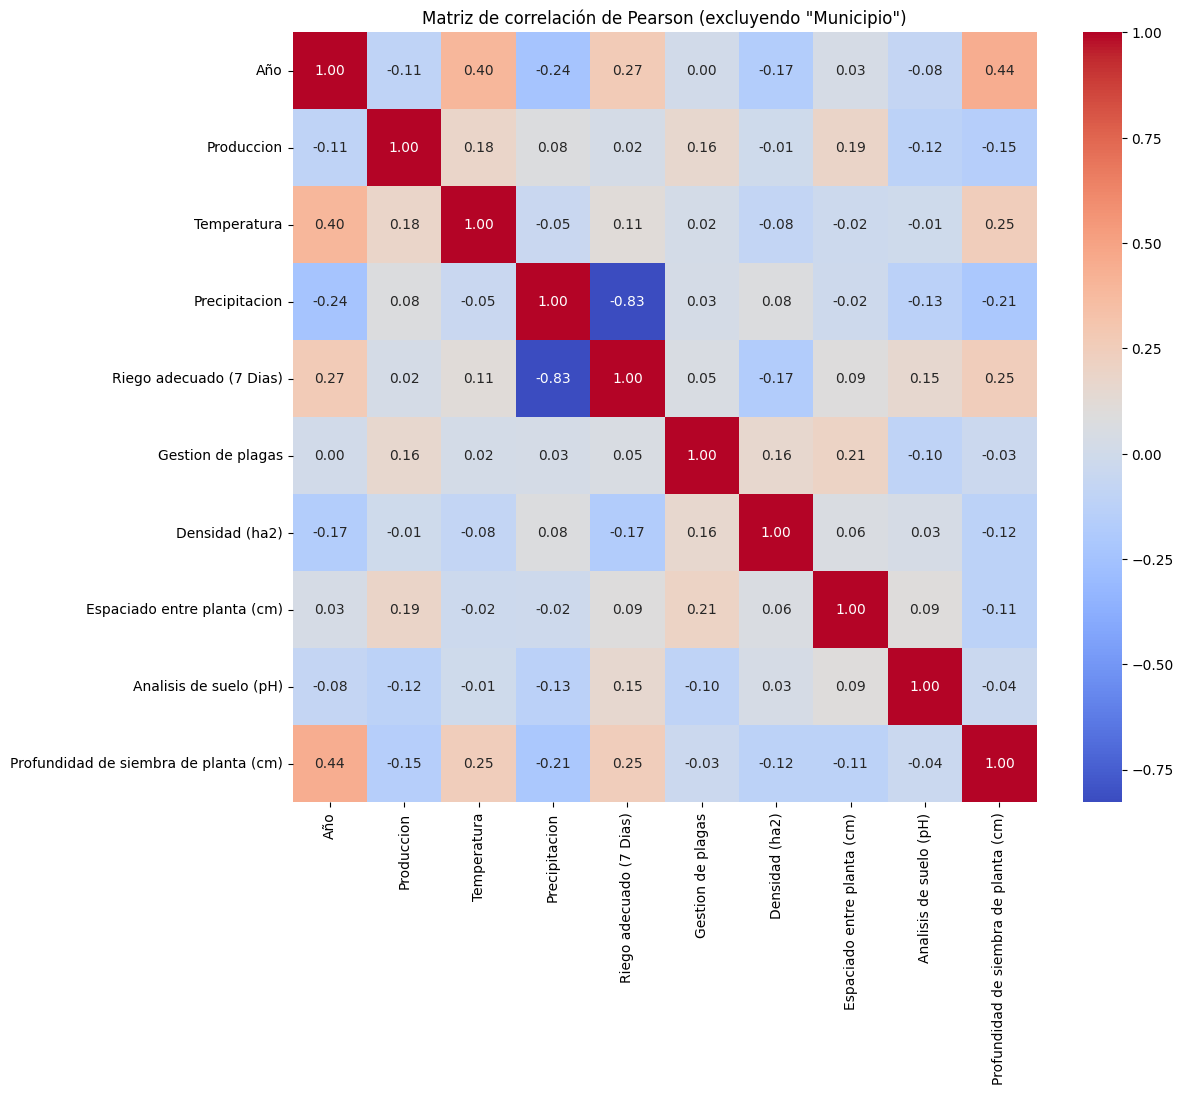

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar solo las columnas numéricas
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación de Pearson
correlation_matrix = numeric_columns.corr(method='pearson')

# Crear un mapa de calor de la matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación de Pearson (excluyendo "Municipio")')
plt.show()


In [29]:
from tensorflow.keras.models import save_model

# Guardar el modelo en formato h5
save_model(model, 'modelo_rf.h5')

<ipython-input-29-c0a020e70e2c>:4: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(model, 'modelo_rf.h5')


AttributeError: 'RandomForestRegressor' object has no attribute 'outputs'